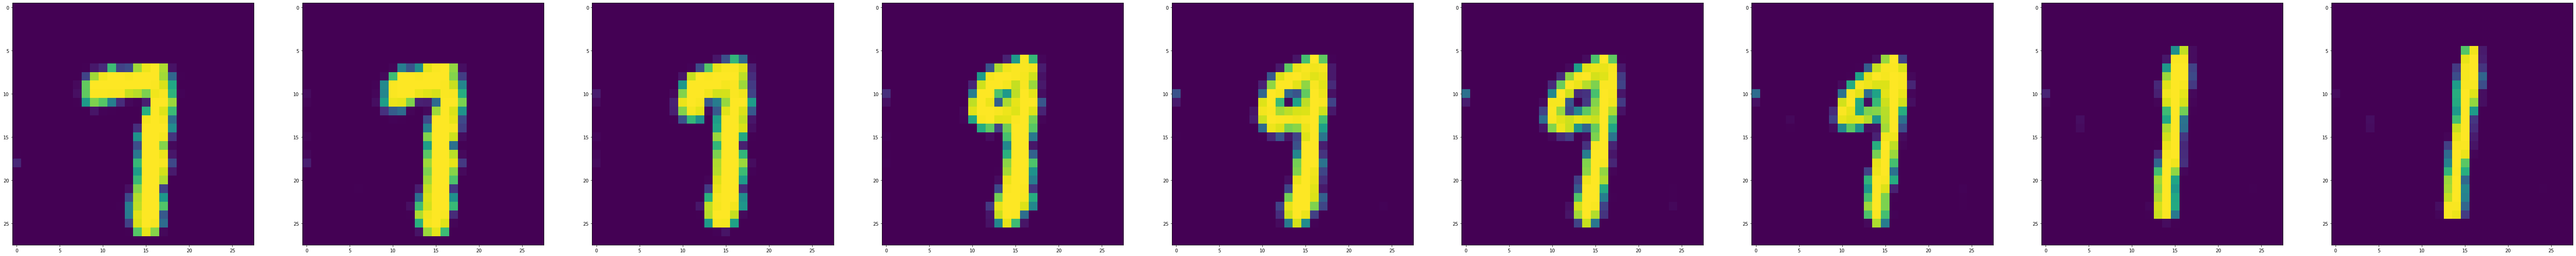

In [20]:
%matplotlib inline
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

train_on_gpu = torch.cuda.is_available()
os.environ['KMP_DUPLICATE_LIB_OK']='True'

if train_on_gpu:
    generator = torch.load('./models/G_187000').eval()
else:
    generator = torch.load("./models/G_187000", map_location='cpu').eval()

# begin noise
begin_noise = torch.randn(100).view(1, 100, 1, 1)
# end noise
end_noise = torch.randn(100).view(1, 100, 1, 1)

noises = []
num = 9

for i in range(num):
    noise = (num-i) * end_noise - i * begin_noise
    noises.append(noise/num)
    
fig, axs = plt.subplots(1, num, figsize=(100, 15))

for i in range(num):
    if train_on_gpu:
        img = generator(noises[i]).squeeze()
    else:
        img = generator(noises[i]).squeeze().cpu()
    axs[i].imshow(img.detach().numpy())
    
plt.show()